In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('financial_data.csv')
df.head()

In [ ]:
df.shape
df.info()
df.describe()

In [ ]:
# Dealing with missing values
df.isnull().sum()

In [ ]:
# One hot encoding for categorical values
df=pd.get_dummies(df,columns=['pay_schedule'],drop_first=True)
df.head()

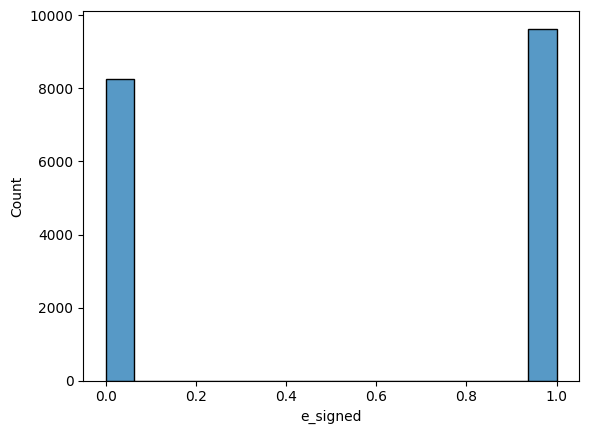

In [ ]:
sns.histplot(df['e_signed'])
plt.show()

In [ ]:
(df.e_signed==0).sum()
(df.e_signed==1).sum()

9639

In [ ]:
df['months employed']=(df['months_employed']+df['years_employed']*12)
df['personal account']=(df['personal_account_m']+df['personal_account_y']*12)
df.head()

In [ ]:
df=df.drop(columns=['months_employed','years_employed','personal_account_m','personal_account_y'])
df.head()

In [ ]:
# Correlation Matrix
df_2=df.drop(columns=['e_signed'])
df_2.head()

In [ ]:
df_2.corrwith(df['e_signed']).plot.bar(
    figsize=(20,10),title='Correlation',rot=45,grid=True
)

In [ ]:
corr=df.corr()
corr

<Axes: >

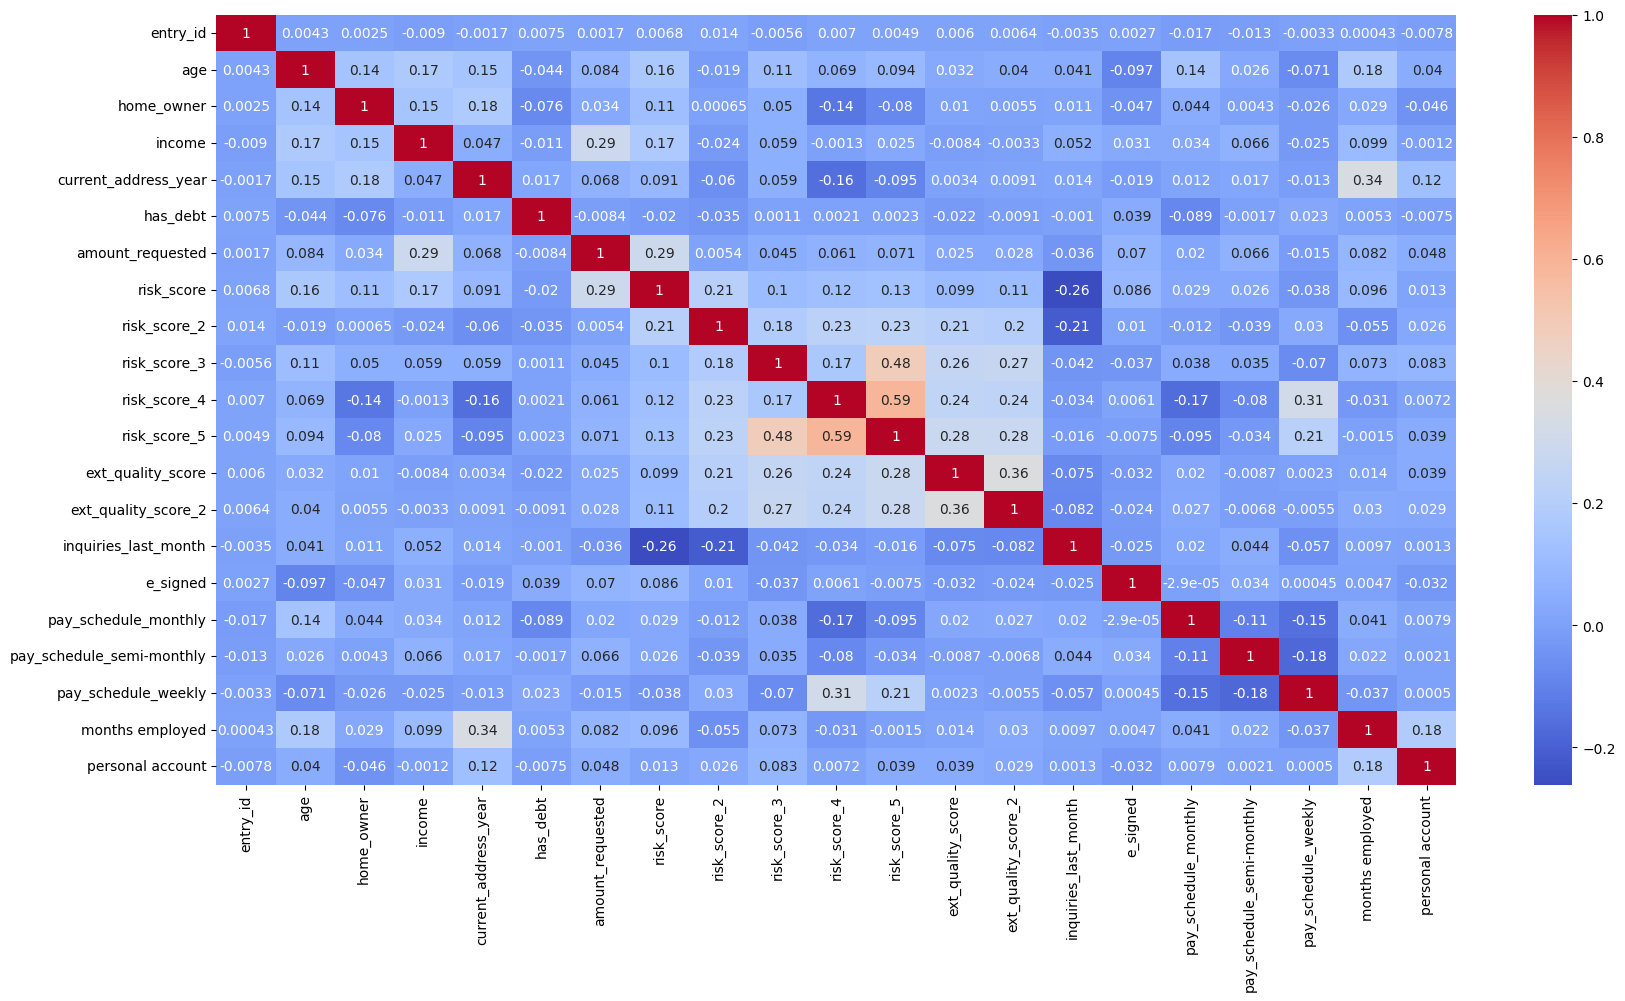

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [ ]:
df=df.drop(columns='entry_id')
df.head()

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['e_signed']),df['e_signed'],
                                               test_size=0.2,random_state=0)

In [ ]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(3582,)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Building the model
# Method 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_1=LogisticRegression()
clf_1.fit(X_train_scaled,Y_train)
y_pred1=clf_1.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
acc=accuracy_score(Y_test,y_pred1)
f1=f1_score(Y_test,y_pred1)
precision=precision_score(Y_test,y_pred1)
recall=recall_score(Y_test,y_pred1)

In [ ]:
result_1=pd.DataFrame([['Logistic Regression',acc,f1,precision,recall]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])
result_1

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.562814,0.634965,0.57663,0.706432


In [ ]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(clf_1,X_train_scaled,Y_train,cv=10)
cv_1

array([0.57571528, 0.56524773, 0.57362177, 0.58060014, 0.58060014,
       0.56594557, 0.57402235, 0.58659218, 0.59776536, 0.57402235])

In [ ]:
print("Accuracy is",np.mean(cv_1)*100,"%")
print("Standard deviation is",np.std(cv_1)*100,"%")

Accuracy is 57.741328696682736 %
Standard deviation is 0.9157162022604375 %


In [ ]:
# Method 2. Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf_2=RandomForestClassifier()
clf_2.fit(X_train_scaled,Y_train)
y_pred2=clf_2.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
acc=accuracy_score(Y_test,y_pred2)
f1=f1_score(Y_test,y_pred2)
precision=precision_score(Y_test,y_pred2)
recall=recall_score(Y_test,y_pred2)

In [ ]:
result_2=pd.DataFrame([['Random Forest',acc,f1,precision,recall]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])
result_2

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.624791,0.660263,0.643984,0.677386


In [ ]:
from sklearn.model_selection import cross_val_score
cv_2=cross_val_score(clf_2,X_train_scaled,Y_train,cv=10)
cv_2

array([0.62805304, 0.62665736, 0.62595953, 0.63363573, 0.6008374 ,
       0.61549197, 0.64804469, 0.63268156, 0.63407821, 0.6222067 ])

In [ ]:
print("Accuracy is",np.mean(cv_2)*100,"%")
print("Standard deviation is",np.std(cv_2)*100,"%")

Accuracy is 62.676462045870096 %
Standard deviation is 1.1878298908678908 %


In [ ]:
# Method 3. XGBoost Classification
from xgboost import XGBClassifier
clf_3=XGBClassifier()
clf_3.fit(X_train_scaled,Y_train)
y_pred3=clf_3.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
acc=accuracy_score(Y_test,y_pred3)
f1=f1_score(Y_test,y_pred3)
precision=precision_score(Y_test,y_pred3)
recall=recall_score(Y_test,y_pred3)

In [ ]:
result_3=pd.DataFrame([['XGBoost Classifier',acc,f1,precision,recall]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])
result_3

,Model,Accuracy,F1,Precision,Recall
0,XGBoost Classifier,0.630374,0.667002,0.647461,0.687759


In [ ]:
from sklearn.model_selection import cross_val_score
cv_3=cross_val_score(clf_3,X_train_scaled,Y_train,cv=10)
cv_3

array([0.63224006, 0.62805304, 0.61898116, 0.63224006, 0.61270063,
       0.62665736, 0.66759777, 0.6222067 , 0.63058659, 0.63337989])

In [ ]:
print("Accuracy is",np.mean(cv_3)*100,"%")
print("Standard deviation is",np.std(cv_3)*100,"%")

Accuracy is 63.04643245603434 %
Standard deviation is 1.389108319882557 %


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth':[2,3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'n_estimators':[100,200,300,400,500],
    'subsample':[0.5,0.7,1.0]
}

In [ ]:
random_search=RandomizedSearchCV(estimator=clf_3,param_distributions=parameters,n_iter=5,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 300,
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [ ]:
# Building the final model
from xgboost import XGBClassifier
clf_final=XGBClassifier(subsample=1.0,n_estimators=300,min_child_weight= 7,
                    max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5)
clf_final.fit(X_train_scaled,Y_train)
y_pred_final=clf_final.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
acc=accuracy_score(Y_test,y_pred_final)
f1=f1_score(Y_test,y_pred_final)
precision=precision_score(Y_test,y_pred_final)
recall=recall_score(Y_test,y_pred_final)

In [ ]:
result=pd.DataFrame([['XGBoost Classifier',acc,f1,precision,recall]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])
result

,Model,Accuracy,F1,Precision,Recall
0,XGBoost Classifier,0.637074,0.669883,0.656219,0.684129


In [ ]:
from sklearn.model_selection import cross_val_score
cv_final=cross_val_score(clf_final,X_train_scaled,Y_train,cv=10)
cv_final

array([0.63921842, 0.61618981, 0.63293789, 0.65387299, 0.63154222,
       0.63084438, 0.67248603, 0.63547486, 0.6452514 , 0.64175978])

In [ ]:
print("Accuracy is",np.mean(cv_final)*100,"%")
print("Standard deviation is",np.std(cv_final)*100,"%")

Accuracy is 63.995777893000984 %
Standard deviation is 1.439341536749936 %


In [ ]:
# Predicting a single observation
single_obs = [[45, 1, 2500,	3,	1,	600,	37000,	0.7373, 0.9035, 0.4877, 0.515977, 0.580918, 0.380918, 10, 0, 0, 0, 36, 30]]

In [ ]:
obs=scaler.transform(single_obs)
obs=pd.DataFrame(obs,columns=single_obs)

In [ ]:
final=clf_final.predict(single_obs)
final

array([0])